In [1]:
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units
import thomsonpy.data_management.formatter as formatter
import matplotlib.pyplot as plt
import numpy as np
import thomsonpy.config.paths as paths
from octree import Octree, Data

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
"""
Starts execution of solar corona modeling with the Predictive Science model.
"""
print("Imaging between", sip.IMAGE_MIN * units.METERS_TO_RSOL, "RSol and" , sip.IMAGE_MAX * units.METERS_TO_RSOL, "RSol.")
print("Resolution = ", sip.IMAGE_RESOLUTION / 1000, " km (", sip.IMAGE_NUM_POINTS, "x", sip.IMAGE_NUM_POINTS, ").")
x_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS) # de - a +
#print(x_values)
y_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS)[::-1] # de + a -
#print(y_values)
model = np.zeros((sip.IMAGE_NUM_POINTS, sip.IMAGE_NUM_POINTS))
print("# Numeric integral steps =", tsp.NUM_Z)

def create_image():
    # Quadrant 1
    print("Loading octree...")
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_1.oct")
    print("Octree loaded.")

    num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS / 4
    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")


    # Quadrant 2
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_2.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 3
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_3.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0 

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 4
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_4.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    formatter.dump("thomsonscattering.np", model)
    model = formatter.load("thomsonscattering.np")


Imaging between [-1.35931973 -1.35931973] RSol and [1.35931973 1.35931973] RSol.
Resolution =  10000.0  km ( 189 x 189 ).
# Numeric integral steps = 80.0


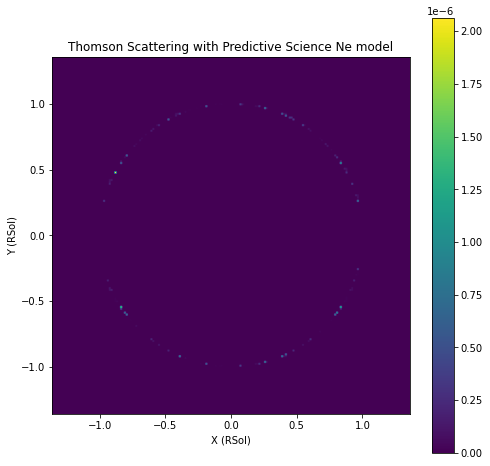

In [3]:
model = formatter.load("thomsonscattering.np")
"""
Visualization of the ThomsonScattering.
"""

plt.figure(figsize=(8, 8))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model, extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()


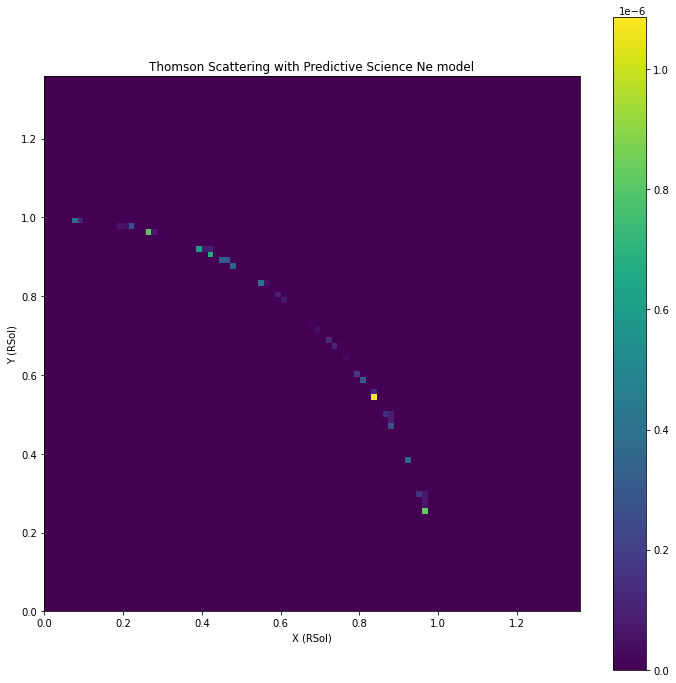

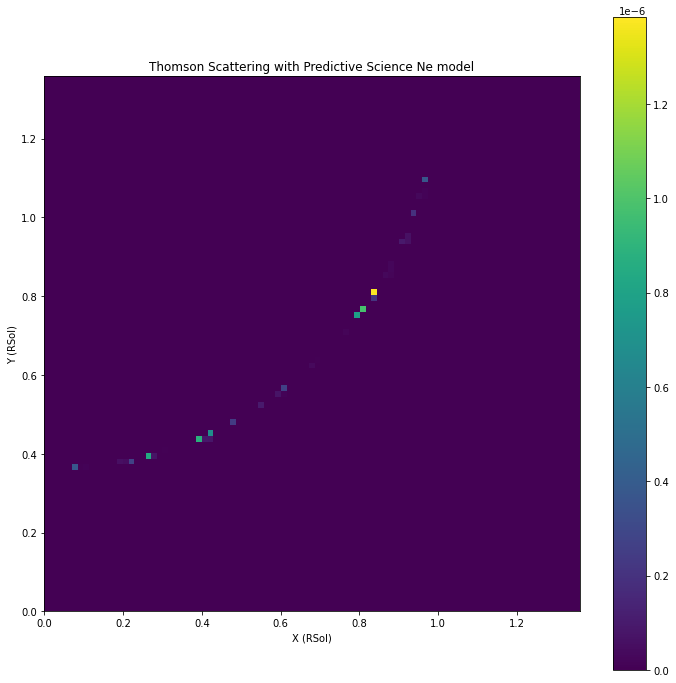

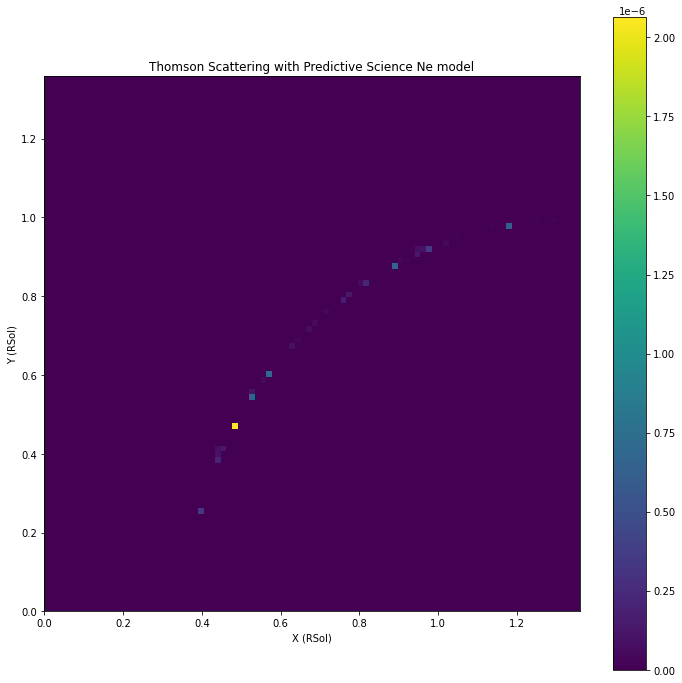

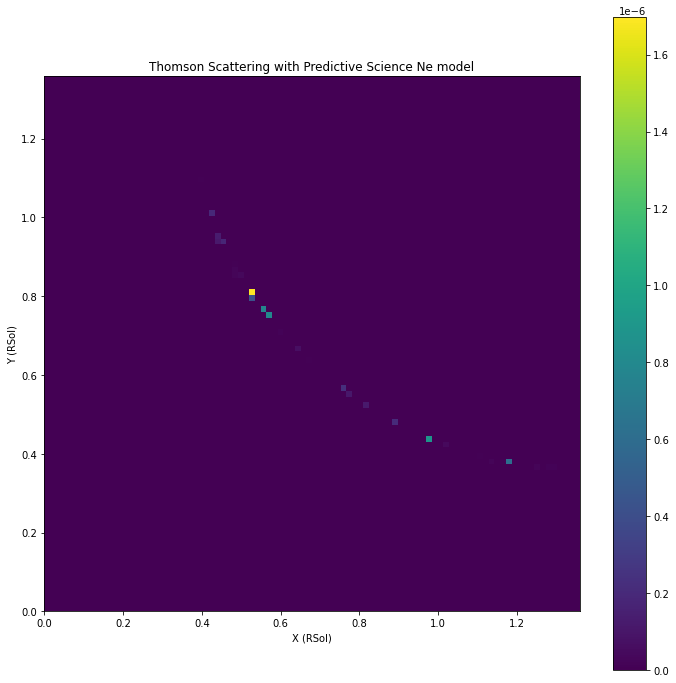

In [4]:
"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model[0:(sip.IMAGE_NUM_POINTS // 2), 0:(sip.IMAGE_NUM_POINTS // 2)], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

"""
Visualization of the Thomson Scattering.
"""

plt.figure(figsize=(12, 12))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), 0:(sip.IMAGE_NUM_POINTS // 2)], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()